In [28]:
import pandas as pd
from os.path import join, isdir
import seaborn as sns
import matplotlib.pyplot as plt

Group experiments by job id's

In [19]:
experiments = {
    '18102942': '0.001 LR, Logit + Shuffle bug',
    '18105570': '0.001 LR, Logit + Shuffle bug',
    '18126401': '0.005 LR, Shuffle bug',
    '18144187': '0.005 LR, no bugs'
}

Combine all results data

In [64]:
models = '../models'
def get_data(model_dir):
    try:
        data  = pd.read_csv(join(model_dir, 'epoch_loss.csv'))
        optim = pd.read_csv(join(model_dir, 'optimizer.csv'))
    except:
        return None
    data['model_dir'] = model_dir
    data['optimizer']     = optim['name'].values[0]
    data['learning_rate'] = optim['learning_rate'].values[0]
    return data

paths = [join(models, path) for path in os.listdir(models)]
jobs = filter(isdir, paths)
df = pd.concat(map(get_data, jobs))
df['job_id'] = df['model_dir'].str.extract(r'.*/(.*)_[0-9]+')
df['experiment'] = df['job_id'].map(experiments.get)
df

,epoch,accuracy,categorical_accuracy,epoch_time,loss,top_k_categorical_accuracy,val_accuracy,val_categorical_accuracy,val_loss,val_top_k_categorical_accuracy,model_dir,optimizer,learning_rate,job_id,experiment
0,0,0.960651,0.960651,1187.640418,0.145986,0.998803,0.220177,0.220177,13.694115,0.228467,../models/18089307_4,Nadam,0.001,18089307,None
1,1,0.961517,0.961517,1089.068708,0.138320,0.999613,0.230705,0.230705,13.378916,0.230705,../models/18089307_4,Nadam,0.001,18089307,None
2,2,0.961213,0.961213,1099.932372,0.151486,0.999926,0.230705,0.230705,11.557586,0.230705,../models/18089307_4,Nadam,0.001,18089307,None
3,3,0.960577,0.960577,1099.001507,0.168548,1.000000,0.230705,0.230705,11.017899,0.230705,../models/18089307_4,Nadam,0.001,18089307,None
4,4,0.959988,0.959988,1097.658838,0.181303,0.999926,0.230705,0.230705,12.613845,0.230705,../models/18089307_4,Nadam,0.001,18089307,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.042739,0.042739,440.647626,3.279452,0.213601,0.000000,0.000000,3.322096,0.000000,../models/18102942_2,Adam,0.001,18102942,"0.001 LR, Logit + Shuffle bug"
96,96,0.070869,0.070869,437.395817,3.251314,0.213601,0.000000,0.000000,3.321811,0.088369,../models/18102942_2,Adam,0.001,18102942,"0.001 LR, Logit + Shuffle bug"
97,97,0.029880,0.029880,446.031597,3.292021,0.265182,0.000000,0.000000,3.322096,0.000000,../models/18102942_2,Adam,0.001,18102942,"0.001 LR, Logit + Shuffle bug"
98,98,0.083911,0.083911,439.219361,3.238110,0.176186,0.000000,0.000000,3.322096,0.000000,../models/18102942_2,Adam,0.001,18102942,"0.001 LR, Logit + Shuffle bug"


In [36]:
df.groupby(['experiment', 'optimizer', 'learning_rate'])\
  .agg({
      'epoch': 'max',
      'epoch_time': 'mean',
      'accuracy': 'max',
      'val_accuracy': 'max'
   })

epoch  \
experiment                    optimizer          learning_rate          
0.001 LR, Logit + Shuffle bug Adadelta           0.001             99   
                              Adagrad            0.001             99   
                              Adam               0.001             99   
                              Adamax             0.001             99   
                              Ftrl               0.001             99   
                              Nadam              0.001             99   
                              RMSprop            0.001             99   
                              SGD                0.010             99   
0.005 LR, Shuffle bug         Adagrad            0.005             43   
                              Adam               0.005             42   
                              Adamax             0.005             43   
                              RMSprop            0.005             43   
0.005 LR, no bugs             AdaBeliefOptimizer 0.005              5   

                                                                epoch_time  \
experiment                    optimizer          learning_rate               
0.001 LR, Logit + Shuffle bug Adadelta           0.001          447.366055   
                              Adagrad            0.001          451.969214   
                              Adam               0.001          439.381955   
                              Adamax             0.001          453.321096   
                              Ftrl               0.001          444.800937   
                              Nadam              0.001          484.597947   
                              RMSprop            0.001          463.146746   
                              SGD                0.010          445.156069   
0.005 LR, Shuffle bug         Adagrad            0.005          465.116370   
                              Adam               0.005          468.728878   
                              Adamax             0.005          465.568089   
                              RMSprop            0.005          459.394996   
0.005 LR, no bugs             AdaBeliefOptimizer 0.005          823.453984   

                                                                accuracy  \
experiment                    optimizer          learning_rate             
0.001 LR, Logit + Shuffle bug Adadelta           0.001          0.172078   
                              Adagrad            0.001          0.626562   
                              Adam               0.001          0.171102   
                              Adamax             0.001          0.224912   
                              Ftrl               0.001          0.042739   
                              Nadam              0.001          0.178507   
                              RMSprop            0.001          0.709912   
                              SGD                0.010          0.467269   
0.005 LR, Shuffle bug         Adagrad            0.005          0.964335   
                              Adam               0.005          0.941870   
                              Adamax             0.005          0.932392   
                              RMSprop            0.005          0.848840   
0.005 LR, no bugs             AdaBeliefOptimizer 0.005          0.994731   

                                                                val_accuracy  
experiment                    optimizer          learning_rate                
0.001 LR, Logit + Shuffle bug Adadelta           0.001              0.000000  
                              Adagrad            0.001              0.000000  
                              Adam               0.001              0.000000  
                              Adamax             0.001              0.000000  
                              Ftrl               0.001              0.000000  
                              Nadam              0.001              0.192821  
                        

In [38]:
molten = df.melt(id_vars=['epoch', 'optimizer', 'experiment'],
                 var_name='metric',
                 value_vars=['accuracy', 'val_accuracy'],
                 value_name='value')\
             .sort_values('optimizer')
molten

,epoch,optimizer,experiment,metric,value
577,5,AdaBeliefOptimizer,"0.005 LR, no bugs",accuracy,0.994731
576,4,AdaBeliefOptimizer,"0.005 LR, no bugs",accuracy,0.994648
575,3,AdaBeliefOptimizer,"0.005 LR, no bugs",accuracy,0.992281
574,2,AdaBeliefOptimizer,"0.005 LR, no bugs",accuracy,0.993340
573,1,AdaBeliefOptimizer,"0.005 LR, no bugs",accuracy,0.985364
...,...,...,...,...,...
1855,75,SGD,"0.001 LR, Logit + Shuffle bug",val_accuracy,0.000000
1856,76,SGD,"0.001 LR, Logit + Shuffle bug",val_accuracy,0.000000
1857,77,SGD,"0.001 LR, Logit + Shuffle bug",val_accuracy,0.000000
1859,79,SGD,"0.001 LR, Logit + Shuffle bug",val_accuracy,0.000000


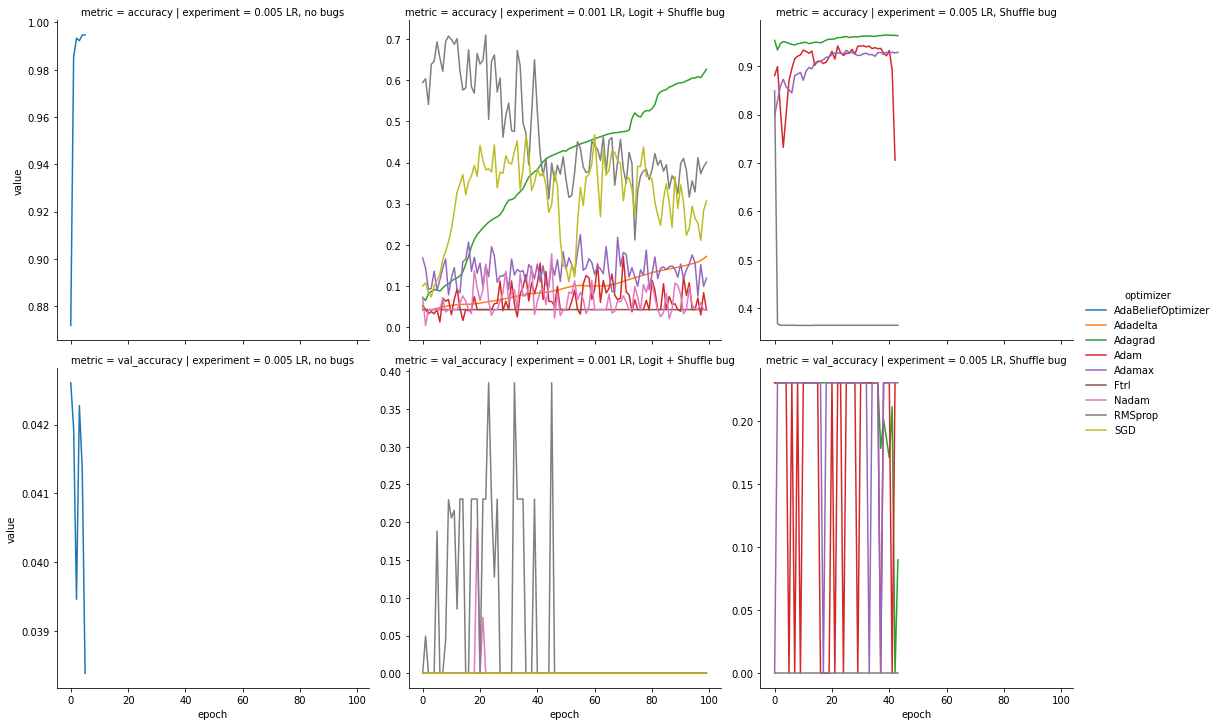

In [39]:
sns.relplot(data=molten, x='epoch', y='value',
    hue='optimizer', kind='line',
    row='metric', col='experiment',
    facet_kws={'sharey': False, 'sharex': True})